# Calories Prediction 

### Introduction:


The Calories Prediction project aims to develop a machine learning model that can accurately estimate the number of calories burned by individuals based on physical activity and biometric data. This is particularly useful for fitness tracking and health monitoring. By using features such as age, gender, weight, height, duration of exercise, heart rate, and body temperature, the model can provide personalized calorie burn predictions. This project leverages data science to promote better lifestyle choices, support weight management goals, and enhance the functionality of fitness applications.

To build an effective calories prediction model, various machine learning techniques were applied. 

(a) The process began with data preprocessing, which involved handling missing values, encoding categorical features, and scaling numerical data to ensure consistency. 

(b) This was followed by Exploratory Data Analysis (EDA) to understand the distribution of data, detect outliers, and identify relationships between variables using visualizations such as histograms, heatmaps, and scatter plots. 

(c) Finally, a Random Forest Regression model was trained on the dataset due to its ability to handle non-linear relationships and provide robust predictions. 

## 1. Data Preprocessing

### Importing Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [127]:
dataset1 = pd.read_csv('exercise_data.csv')
dataset2 = pd.read_csv('calories_1.csv')

In [128]:
dataset1.shape

(15000, 8)

In [129]:
dataset2.shape

(15000, 2)

### Concatinating the 2 datasets

In [130]:
dataset = pd.concat([dataset1,dataset2],axis=1)
dataset

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,15644082,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,17212577,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,17271188,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,18643037,11.0


In [131]:
dataset.drop(['User_ID','User_ID'],axis=1,inplace=True)

In [132]:
dataset

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


### Dividing the dataset into Independent and Dependednt variables

In [133]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [134]:
print(X)

[['male' 68 190.0 ... 29.0 105.0 40.8]
 ['female' 20 166.0 ... 14.0 94.0 40.3]
 ['male' 69 179.0 ... 5.0 88.0 38.7]
 ...
 ['female' 43 159.0 ... 16.0 90.0 40.1]
 ['male' 78 193.0 ... 2.0 84.0 38.3]
 ['male' 63 173.0 ... 18.0 92.0 40.5]]


In [135]:
print(y)

[231.  66.  26. ...  75.  11.  98.]


### Encoding the categorical variable into numerical variable

In [136]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X = ct.fit_transform(X)
print(X)

[[0.0 1.0 68 ... 29.0 105.0 40.8]
 [1.0 0.0 20 ... 14.0 94.0 40.3]
 [0.0 1.0 69 ... 5.0 88.0 38.7]
 ...
 [1.0 0.0 43 ... 16.0 90.0 40.1]
 [0.0 1.0 78 ... 2.0 84.0 38.3]
 [0.0 1.0 63 ... 18.0 92.0 40.5]]


### Splitting the dataset into training and testing datasets

In [137]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.4,random_state = 0)

In [138]:
print(X_train)

[[0.0 1.0 38 ... 6.0 97.0 39.5]
 [0.0 1.0 35 ... 24.0 99.0 40.9]
 [0.0 1.0 66 ... 1.0 83.0 37.9]
 ...
 [1.0 0.0 36 ... 22.0 106.0 40.6]
 [1.0 0.0 56 ... 13.0 94.0 39.9]
 [0.0 1.0 28 ... 2.0 72.0 38.0]]


In [139]:
print(X_test)

[[1.0 0.0 27 ... 9.0 94.0 39.8]
 [0.0 1.0 28 ... 6.0 82.0 39.3]
 [1.0 0.0 28 ... 22.0 95.0 40.8]
 ...
 [0.0 1.0 34 ... 14.0 93.0 40.2]
 [0.0 1.0 77 ... 8.0 88.0 39.8]
 [1.0 0.0 37 ... 19.0 106.0 40.4]]


In [140]:
print(y_train)

[ 30. 130.   5. ... 137.  69.   1.]


In [141]:
print(y_test)

[ 43.  15. 101. ...  60.  44. 115.]


### Feature Scaling

In [142]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 2:] = sc.fit_transform(X_train[:, 2:])
X_test[:, 2:] = sc.transform(X_test[:, 2:])


In [143]:
print(X_train)

[[0.0 1.0 -0.2835396948043135 ... -1.143916933726301 0.15910554825383974
  -0.667986530249336]
 [0.0 1.0 -0.45998007738322677 ... 1.0214785239000226 0.3671168693294578
  1.1213011419258558]
 [0.0 1.0 1.3632372092655438 ... -1.7454156719558356 -1.2969736992754868
  -2.7128867270209875]
 ...
 [1.0 0.0 -0.40116661652358904 ... 0.7808790286082089 1.095156493094121
  0.737882355031175]
 [1.0 0.0 0.7751026006691661 ... -0.301818700204953 -0.15291143335958735
  -0.15676148105642537]
 [0.0 1.0 -0.8716743034006911 ... -1.6251159243099287 -2.441035965191386
  -2.5850804647227577]]


In [144]:
print(X_test)

[[1.0 0.0 -0.9304877642603289 ... -0.7830176907885805
  -0.15291143335958735 -0.2845677433546553]
 [0.0 1.0 -0.8716743034006911 ... -1.143916933726301 -1.4009793598132958
  -0.9235990548457959]
 [1.0 0.0 -0.8716743034006911 ... 0.7808790286082089 -0.04890577282177831
  0.9934948796276258]
 ...
 [0.0 1.0 -0.5187935382428646 ... -0.18151895255904613
  -0.25691709389739636 0.22665730583826443]
 [0.0 1.0 2.010185278721559 ... -0.9033174384344874 -0.7769453965864416
  -0.2845677433546553]
 [1.0 0.0 -0.34235315566395125 ... 0.41997978567048827 1.095156493094121
  0.4822698304347152]]


## 2. Exploratory Data Analysis (EDA)

### Understanding the dataset

In [145]:
dataset

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [146]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

### Basic info and summary

In [147]:
dataset.shape

(15000, 8)

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [149]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


### Checking missing values and duplicates

In [150]:
dataset.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [151]:
dataset.duplicated().sum()

np.int64(1)

### (a) Univariate Analysis 

/var/folders/xq/wtb2_20n2011hfxvtgs_r82w0000gn/T/ipykernel_5996/1383627287.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


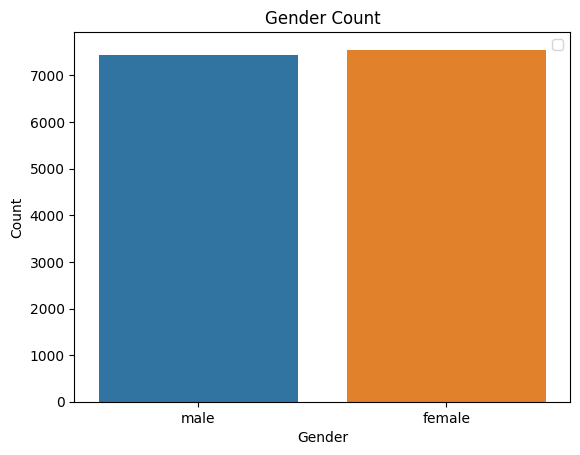

In [152]:
# Gender Count

sns.countplot(x='Gender',data = dataset,hue = 'Gender')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

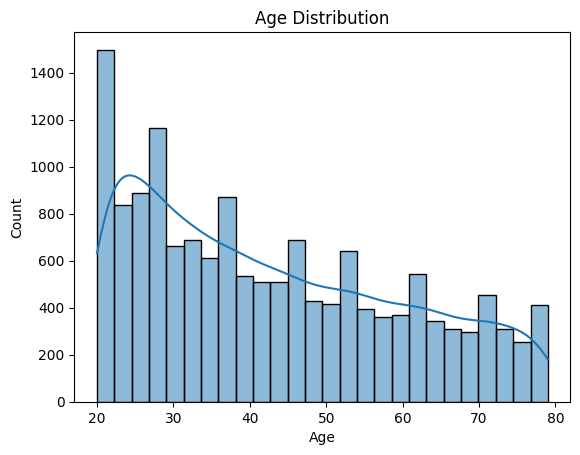

In [153]:
# Age distribution

sns.histplot(dataset['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

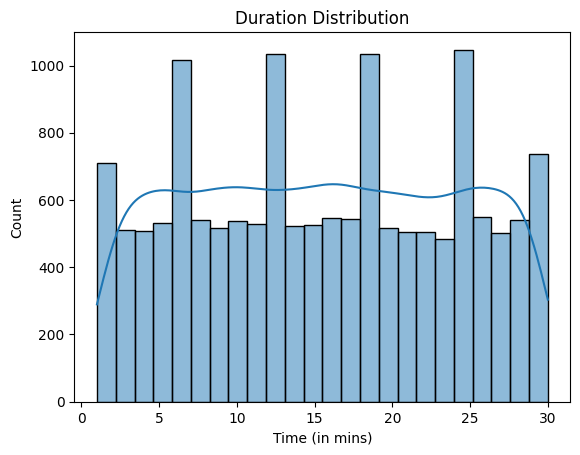

In [154]:
# Duration distribution

sns.histplot(dataset['Duration'], kde=True)

plt.title('Duration Distribution')
plt.xlabel('Time (in mins)')
plt.ylabel('Count')
plt.show()

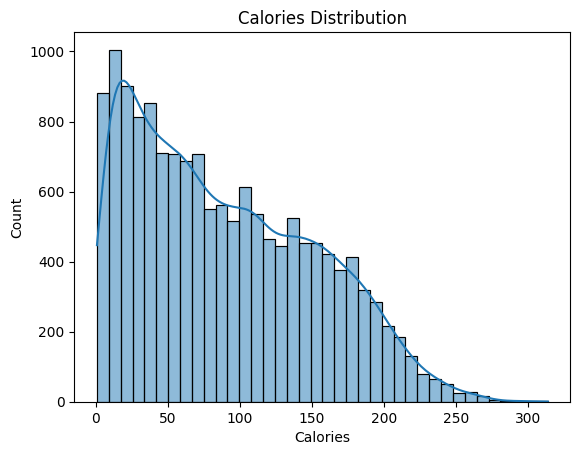

In [155]:
# Calories distribution

sns.histplot(dataset['Calories'], kde=True)

plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()

### (b) Bivariate Analysis

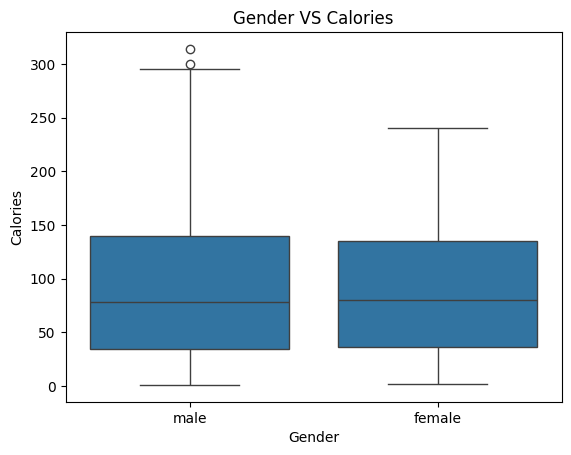

In [156]:
# Gender vs Calories
sns.boxplot(x='Gender', y='Calories', data=dataset)

plt.title('Gender VS Calories')
plt.xlabel('Gender')
plt.ylabel('Calories')
plt.show()

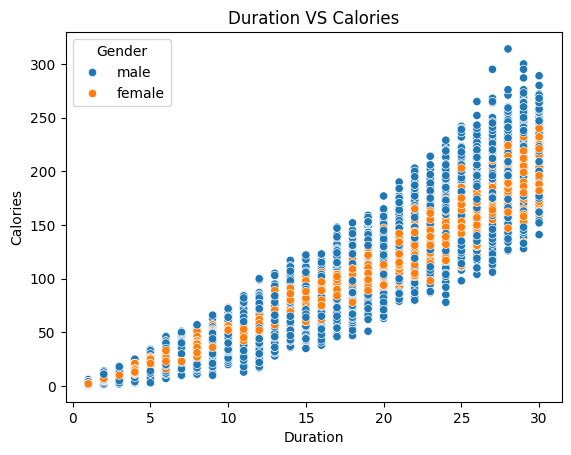

In [157]:
# Duration vs Calories
sns.scatterplot(x='Duration', y='Calories', hue='Gender', data=dataset)

plt.title('Duration VS Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()

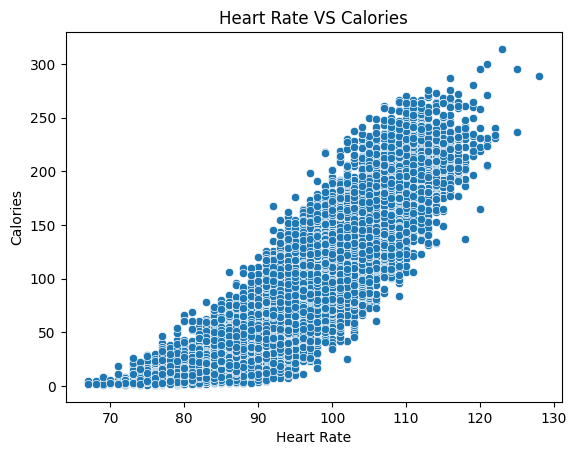

In [158]:
# Heart Rate vs Calories
sns.scatterplot(x='Heart_Rate', y='Calories', data=dataset)

plt.title('Heart Rate VS Calories')
plt.xlabel('Heart Rate')
plt.ylabel('Calories')
plt.show()

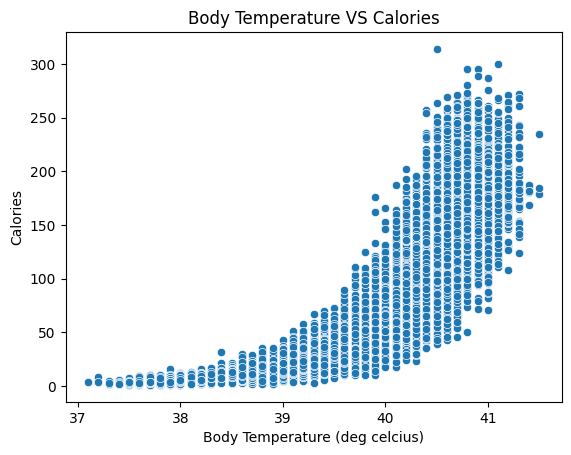

In [159]:
# Body Temp vs Calories

sns.scatterplot(x='Body_Temp', y='Calories', data=dataset)

plt.title('Body Temperature VS Calories')
plt.xlabel('Body Temperature (deg celcius)')
plt.ylabel('Calories')
plt.show()

### (c) Multivariate Analysis

<Axes: >

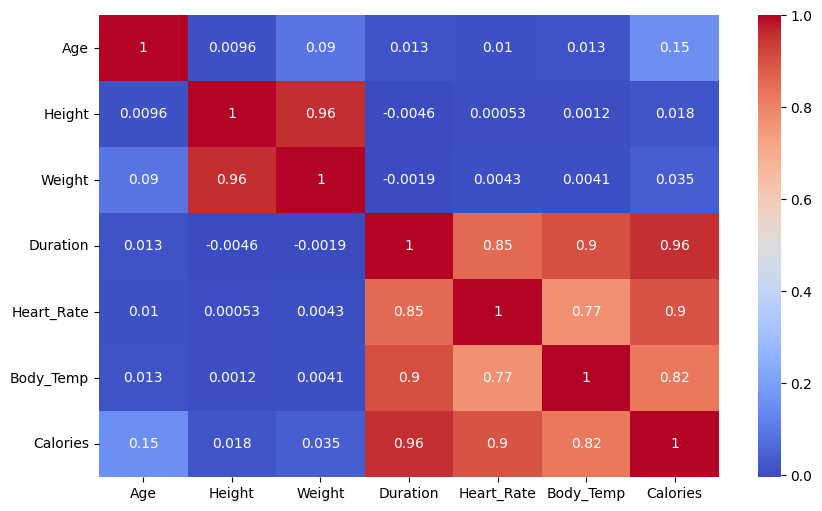

In [160]:
# Correlation Matrix

corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## 3. Regression

### Training the Random Forest Regression Model on the dataset

In [161]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 10 , random_state=0)
rfr.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting a new result

In [162]:
print(rfr.predict([[0,1,68,190.0,94.0,29.0,105.0,40.8]]))

[229.1]


### Predicting the test set results

In [163]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))


In [164]:
y_pred = rfr.predict(X_test)

# Inverse transform using sc_y, not sc_X
predicted_values = sc_y.inverse_transform(y_pred.reshape(-1, 1))


In [168]:
print(predicted_values)

[[226.94030458]
 [151.99442936]
 [226.94030458]
 ...
 [151.99442936]
 [151.99442936]
 [226.94030458]]


In [166]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R^2 score (acts like accuracy in regression)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score (Accuracy):", r2)


Mean Absolute Error (MAE): 87.9745
R² Score (Accuracy): -1.9890886082449422
